In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)


In [138]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\dataset\russianhousing.csv')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [10]:
df.shape
df.dtypes

id                      int64
timestamp              object
full_sq               float64
life_sq               float64
floor                   int64
                       ...   
church_count_5000       int64
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
Length: 291, dtype: object

In [13]:
df_num=df.select_dtypes(include=[np.number])
df_nnum=df.select_dtypes(exclude=[np.number])

In [20]:
num_col=df_nnum.columns.values
print(num_col)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


In [38]:
col=df.columns[:30]
colors=['#000099','#ffff00']
sns.heatmap(df[col].isnull(),cmap=colors)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [87]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 15.0%
floor - 0.0%
max_floor - 0.0%
material - 0.0%
build_year - 14.0%
num_room - 0.0%
kitch_sq - 0.0%
state - 9.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 21.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 21.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 45.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_all -

In [88]:
for col in df:
    missing=df[col].isnull()
    num_miss=np.sum(missing)
    
    
    if num_miss>0:
        print('created missing indicator for {}'.format(col))
        df['{}_ismissing'.format(col)]=missing

created missing indicator for life_sq
created missing indicator for build_year
created missing indicator for state
created missing indicator for product_type
created missing indicator for preschool_quota
created missing indicator for school_quota
created missing indicator for hospital_beds_raion
created missing indicator for raion_build_count_with_material_info
created missing indicator for build_count_block
created missing indicator for build_count_wood
created missing indicator for build_count_frame
created missing indicator for build_count_brick
created missing indicator for build_count_monolith
created missing indicator for build_count_panel
created missing indicator for build_count_foam
created missing indicator for build_count_slag
created missing indicator for build_count_mix
created missing indicator for raion_build_count_with_builddate_info
created missing indicator for build_count_before_1920
created missing indicator for build_count_1921-1945
created missing indicator for bu

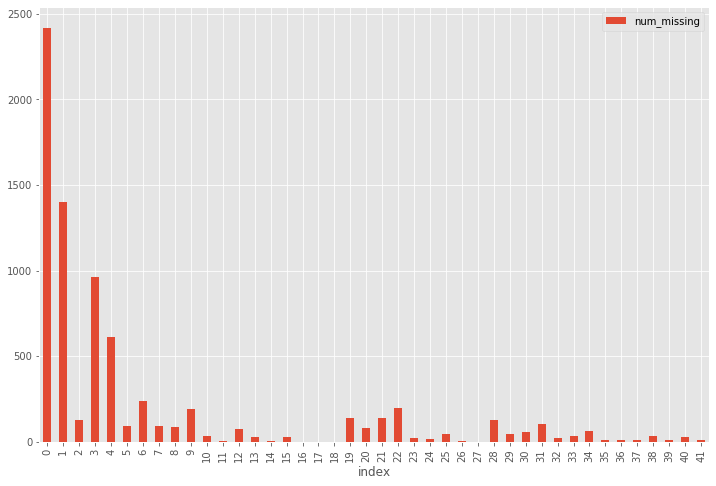

In [94]:
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [163]:
df_numeric=df.select_dtypes(include=[np.number])
colm=df_numeric.columns.values

for col in colm:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
#         print('imputing missing values for: {}'.format(col))
#        df['{}_ismissing'.format(col)] = missing
        med = df_numeric[col].median()
        df[col] = df_numeric[col].fillna(med)

In [168]:
collist=df.columns.values
print(collist)

['id' 'timestamp' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material'
 'build_year' 'num_room' 'kitch_sq' 'state' 'product_type' 'sub_area'
 'area_m' 'raion_popul' 'green_zone_part' 'indust_part'
 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25'
 'culture_objects_top_25_raion' 'shopping_centers_raion' 'office_raion'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'full_all' 'male_f'
 'female_f' 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male'

In [182]:
lst=[]
for colo in collist:
    nullcol=df[colo].isnull()
    nullvalues=np.sum(nullcol)
#     if nullvalues==0:
    lst=lst.append(nullvalues)
print(lst)

AttributeError: 'NoneType' object has no attribute 'append'